# Análise exploratória de dados

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Coleta de dados

In [22]:
data = pd.read_csv('../data/processed/preprocessing.csv')
data

,Carga Horária,Categoria da Situação,Código da Matrícula,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
0,4560,Concluintes,72082427,branca,2017-04-07,2019-12-21,15 a 19 anos,1.000,18.0,CPII,2019-12-01,Região Sudeste,"1,5<RFP<=2,5",Feminino,Matutino,RJ,Campus Tijuca II
1,4560,Concluintes,72082311,branca,2017-04-07,2019-12-21,15 a 19 anos,1.000,18.0,CPII,2019-12-01,Região Sudeste,Não declarada,Masculino,Matutino,RJ,Campus Tijuca II
2,4560,Concluintes,72082437,branca,2017-04-07,2019-12-21,15 a 19 anos,1.000,18.0,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II
3,4560,Concluintes,72898296,branca,2017-04-07,2019-12-21,15 a 19 anos,1.000,18.0,CPII,2019-12-01,Região Sudeste,Não declarada,Feminino,Matutino,RJ,Campus Tijuca II
4,4560,Concluintes,72082281,branca,2017-04-07,2019-12-21,15 a 19 anos,1.000,18.0,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,3600,Concluintes,84230653,branca,2018-02-26,2020-12-31,15 a 19 anos,1.067,19.0,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4246,3600,Concluintes,84224256,branca,2018-02-26,2020-12-31,15 a 19 anos,1.067,18.0,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4247,3600,Concluintes,84224068,parda,2018-02-26,2020-12-31,15 a 19 anos,1.067,19.0,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4248,2460,Concluintes,84799648,branca,2018-02-06,2020-12-20,15 a 19 anos,1.067,18.0,UFRPE - CODAI,2021-06-01,Região Nordeste,"0<RFP<=0,5",Masculino,Vespertino,PE,Colégio Agrícola Dom Agostinho Ikas da UFRPE


## 2. Descrição dos dados





### 2.1. Dicionário de dados

In [23]:
dicionario = pd.read_csv('../data/external/dicionario.csv', sep=',')
dicionario

,Variável,Significado,Tipo,Subtipo
0,Carga Horária,Carga horária do ciclo de matrícula.,Quantitativa,Discreta
1,Categoria da Situação,"Situações de matrícula: concluintes, em curso ...",Qualitativa,Nominal
2,Código da Matrícula,Código da matrícula.,Quantitativa,Discreta
3,Cor/Raça,Cor/Raça do aluno.,Qualitativa,Nominal
4,Data de Início do Ciclo,Data de início do ciclo de matrícula.,Quantitativa,Discreta
5,Data de Fim Previsto do Ciclo,Data prevista para o final do ciclo de matrícula.,Quantitativa,Discreta
6,Faixa Etária,Agrupamento baseado na idade dos estudantes.,Qualitativa,Ordinal
7,Fator Esforço Curso,Ajusta a contagem de matrículas-equivalentes p...,Quantitativa,Continua
8,Idade,Idade do estudante.,Quantitativa,Discreta
9,Instituição,Sigla da Instituição.,Qualitativa,Nominal


In [24]:
data.select_dtypes(include='object')

,Categoria da Situação,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
0,Concluintes,branca,2017-04-07,2019-12-21,15 a 19 anos,CPII,2019-12-01,Região Sudeste,"1,5<RFP<=2,5",Feminino,Matutino,RJ,Campus Tijuca II
1,Concluintes,branca,2017-04-07,2019-12-21,15 a 19 anos,CPII,2019-12-01,Região Sudeste,Não declarada,Masculino,Matutino,RJ,Campus Tijuca II
2,Concluintes,branca,2017-04-07,2019-12-21,15 a 19 anos,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II
3,Concluintes,branca,2017-04-07,2019-12-21,15 a 19 anos,CPII,2019-12-01,Região Sudeste,Não declarada,Feminino,Matutino,RJ,Campus Tijuca II
4,Concluintes,branca,2017-04-07,2019-12-21,15 a 19 anos,CPII,2019-12-01,Região Sudeste,"RFP>3,5",Feminino,Matutino,RJ,Campus Tijuca II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,Concluintes,branca,2018-02-26,2020-12-31,15 a 19 anos,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4246,Concluintes,branca,2018-02-26,2020-12-31,15 a 19 anos,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4247,Concluintes,parda,2018-02-26,2020-12-31,15 a 19 anos,UFSM - POLITÉCNICO,2021-02-01,Região Sul,Não declarada,Feminino,Matutino,RS,Colégio Politécnico da UFSM
4248,Concluintes,branca,2018-02-06,2020-12-20,15 a 19 anos,UFRPE - CODAI,2021-06-01,Região Nordeste,"0<RFP<=0,5",Masculino,Vespertino,PE,Colégio Agrícola Dom Agostinho Ikas da UFRPE


In [25]:
categorica = data.select_dtypes(include='object')

In [28]:
data.select_dtypes(exclude='object')

,Carga Horária,Código da Matrícula,Fator Esforço Curso,Idade
0,4560,72082427,1.000,18.0
1,4560,72082311,1.000,18.0
2,4560,72082437,1.000,18.0
3,4560,72898296,1.000,18.0
4,4560,72082281,1.000,18.0
...,...,...,...,...
4245,3600,84230653,1.067,19.0
4246,3600,84224256,1.067,18.0
4247,3600,84224068,1.067,19.0
4248,2460,84799648,1.067,18.0


In [27]:
numerica = data.select_dtypes(exclude='object')

## 3. Perguntas de partida e hipóteses

### Qual a distribuição dos dados (variável por variável)?

In [29]:
data.describe(include='all')

,Carga Horária,Categoria da Situação,Código da Matrícula,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
count,4250.000000,4250,4.250000e+03,4250,4250,4250,4250,4250.000000,4250.000000,4250,4250,4250,4250,4250,4250,4250,4250
unique,NaN,2,NaN,6,44,41,8,NaN,NaN,10,84,3,7,2,4,6,18
top,NaN,Concluintes,NaN,branca,2017-04-07,2019-12-21,15 a 19 anos,NaN,NaN,CPII,2020-01-01,Região Sudeste,Não declarada,Feminino,Matutino,RJ,Campus São Cristóvão III
freq,NaN,3279,NaN,1937,1185,1219,3471,NaN,NaN,2828,1066,3233,1409,2211,2690,3008,588
mean,3991.135294,NaN,8.094893e+07,NaN,NaN,NaN,NaN,1.028944,18.494118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,932.709563,NaN,8.801851e+06,NaN,NaN,NaN,NaN,0.033193,1.602125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2400.000000,NaN,5.834909e+07,NaN,NaN,NaN,NaN,1.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2800.000000,NaN,7.248616e+07,NaN,NaN,NaN,NaN,1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4560.000000,NaN,8.512098e+07,NaN,NaN,NaN,NaN,1.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4560.000000,NaN,8.703046e+07,NaN,NaN,NaN,NaN,1.067000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Distribuição das variáveis qualitativas

In [51]:
sns.set_theme(style="whitegrid")

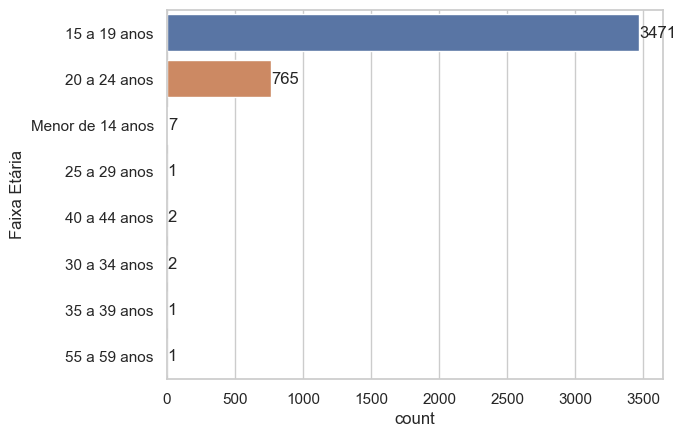

In [53]:
ax= sns.countplot(categorica,y='Faixa Etária')
ax.bar_label(ax.containers[0])
plt.show()

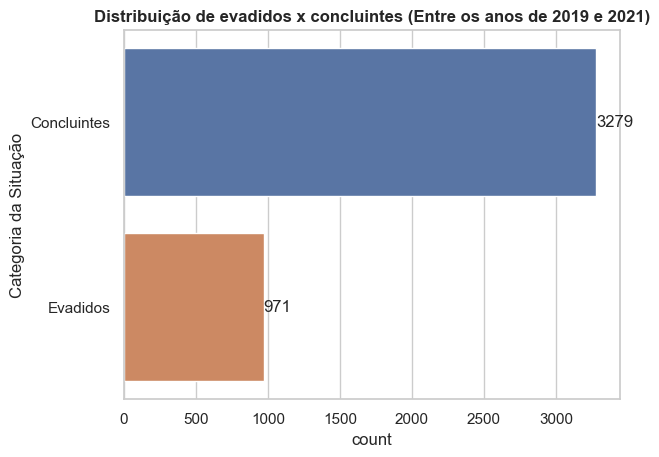

In [61]:
ax= sns.countplot(categorica,y='Categoria da Situação')
ax.bar_label(ax.containers[0])
plt.title("Distribuição de evadidos x concluintes (Entre os anos de 2019 e 2021)",
          fontweight='bold')
plt.show()

In [45]:
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


In [43]:
long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", text='count',color="medal", title="Long-Form Input")
fig.show()

## 4. Percepções


## 5. Observação